In [197]:
import numpy as np                                          #Importing package numpys (For Numerical Python)
import pandas as pd                                         #Importing for panel data analysis
pd.set_option('display.max_columns', None)                  # Unfolding hidden features if the cardinality is high
#---------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                             #Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                       # Backend used for rendering and GUI integration
import seaborn as sns                                       #Importin seaborm library for interactive visualization
%matplotlib inline
#---------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split        # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression         # To create the Logistic Regression Model
#---------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix                #For verifying model performance using confusion matrix
from sklearn.metrics import accuracy_score                  #For calculating the accuracy for the model
from sklearn.metrics import f1_score                        # For Checking the F1-Score of our model
#---------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Cleaned data acquisition

In [198]:
#Read and load data
hotel_data = pd.read_csv('hotel_cleaned_data.csv')
#Display data
hotel_data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,guest_location
0,Resort Hotel,1,122,0,4,2,0.0,0,BB,FRA,Online TA,TA/TO,0,never cancelled,0,D,D,yes,No Deposit,0,Transient,74.75,0,2,Canceled,2016-11-27,2016-12-27,International
1,City Hotel,1,20,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,never cancelled,0,A,A,no,No Deposit,0,Transient-Party,62.00,0,0,Canceled,2015-07-17,2015-07-22,Local
2,City Hotel,0,87,2,3,3,0.0,0,BB,BEL,Online TA,TA/TO,0,never cancelled,0,D,D,no,No Deposit,0,Transient,171.00,0,0,Check-Out,2017-04-21,2017-04-16,International
3,Resort Hotel,0,0,0,1,1,0.0,0,BB,PRT,Online TA,TA/TO,1,never cancelled,1,A,A,no,No Deposit,0,Transient,43.00,0,1,Check-Out,2017-02-03,2017-02-02,Local
4,Resort Hotel,1,42,0,1,2,0.0,0,BB,IRL,Online TA,TA/TO,0,never cancelled,0,A,A,no,No Deposit,0,Transient,109.00,0,1,Canceled,2016-08-26,2016-09-23,International


### checking data again before EDA

In [199]:
# Number of Rows and Columns
hotel_data.shape

(83439, 28)

In [202]:
# basic info. of the data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83439 non-null  object        
 1   is_canceled                     83439 non-null  int64         
 2   lead_time                       83439 non-null  int64         
 3   stays_in_weekend_nights         83439 non-null  int64         
 4   stays_in_week_nights            83439 non-null  int64         
 5   adults                          83439 non-null  int64         
 6   children                        83439 non-null  float64       
 7   babies                          83439 non-null  int64         
 8   meal                            83439 non-null  object        
 9   country                         83439 non-null  object        
 10  market_segment                  83439 non-null  object        
 11  di

In [201]:
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date'], format="%Y-%m-%d")
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'], format="%Y-%m-%d")

In [203]:
#looking for missing data, data type, zero frequency and unique values in each column.

hotel_missing = []
for name in hotel_data.columns:
  hotel_missing.append(
      [
       name,
       hotel_data[name].dtypes,
       hotel_data[name].isnull().sum(),
       round(hotel_data[name].isnull().sum()/len(hotel_data)*100,2),
       hotel_data[name][hotel_data[name] == 0].count(),
       hotel_data[name][hotel_data[name] == 0].count()/hotel_data[name].shape[0]*100,
#      hotel_data[name].duplicated().sum(),
       hotel_data[name].nunique()
       ]
       )

hotel_missing = pd.DataFrame(hotel_missing, columns = ['Column','Dtype','Null','Null(%)','zero_frequency','zero_frequency(%)','nunique'])

In [204]:
hotel_missing

,Column,Dtype,Null,Null(%),zero_frequency,zero_frequency(%),nunique
0,hotel,object,0,0.0,0,0.000000,2
1,is_canceled,int64,0,0.0,52571,63.005309,2
2,lead_time,int64,0,0.0,4399,5.272115,475
3,stays_in_weekend_nights,int64,0,0.0,36352,43.567157,15
4,stays_in_week_nights,int64,0,0.0,5341,6.401083,30
5,adults,int64,0,0.0,166,0.198948,12
6,children,float64,0,0.0,77440,92.810317,4
7,babies,int64,0,0.0,82778,99.207805,3
8,meal,object,0,0.0,0,0.000000,4
9,country,object,0,0.0,0,0.000000,170


In [205]:
#describe - statistical measures of the data
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,83439.0,0.369947,0.482793,0.0,0.000,0.0,1.0,1.0
lead_time,83439.0,104.007299,106.879229,0.0,18.000,69.0,160.0,737.0
stays_in_weekend_nights,83439.0,0.926797,0.996620,0.0,0.000,1.0,2.0,18.0
stays_in_week_nights,83439.0,2.499790,1.900645,0.0,1.000,2.0,3.0,42.0
adults,83439.0,1.858951,0.578142,0.0,2.000,2.0,2.0,50.0
children,83439.0,0.103824,0.397648,0.0,0.000,0.0,0.0,3.0
babies,83439.0,0.008030,0.090450,0.0,0.000,0.0,0.0,2.0
is_repeated_guest,83439.0,0.031496,0.174655,0.0,0.000,0.0,0.0,1.0
previous_bookings_not_canceled,83439.0,0.134565,1.483181,0.0,0.000,0.0,0.0,71.0
days_in_waiting_list,83439.0,2.306907,17.502740,0.0,0.000,0.0,0.0,391.0


In [206]:
#describe - statistical measures of the data
hotel_data.describe(include = 'O').T

,count,unique,top,freq
hotel,83439,2,City Hotel,55484
meal,83439,4,BB,64529
country,83439,170,PRT,33940
market_segment,83439,7,Online TA,39601
distribution_channel,83439,4,TA/TO,68496
previous_cancellations,83439,2,never cancelled,78912
reserved_room_type,83439,9,A,60081
assigned_room_type,83439,10,A,51811
booking_changes,83439,2,no,70894
deposit_type,83439,3,No Deposit,73137


## EDA

### Target Variable : Cancellation Rate

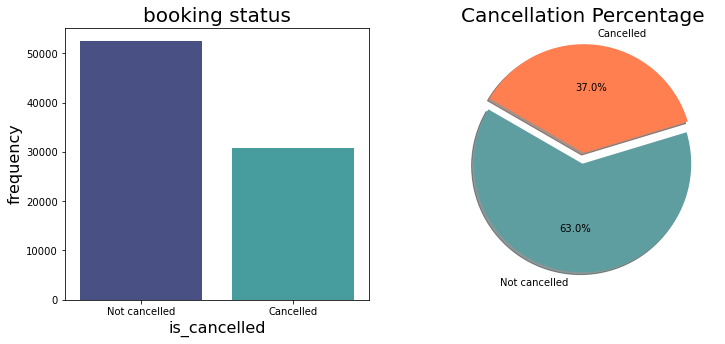

In [207]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

#count plot
sns.countplot(x= 'is_canceled' , data = hotel_data, palette = 'mako', ax=ax[0])
ax[0].set_title('booking status' , size =20)
ax[0].set_xlabel('is_cancelled', size = 16)
ax[0].set_ylabel('frequency', size = 16)
ax[0].set_xticks(ticks = [0, 1], labels = ['Not cancelled', 'Cancelled'])

#pie plot
ax[1].pie(hotel_data['is_canceled'].value_counts(), labels = ['Not cancelled', 'Cancelled'], explode = (0, 0.1),
         autopct='%2.1f%%', 
        shadow=True, startangle=150, colors=['#5F9EA0', '#FF7F50'])
# ax[1].axis('equal')
ax[1].set_title('Cancellation Percentage', size = 20)

plt.show()

**Interpretation:**
- **37%** bookings were cancelled.
- By calculating the percentage of cancelled bookings, we can determine the overall cancellation rate, which can be used to help the hotel improve its booking and cancellation policies.
    - For example, if the cancellation rate is high, the hotel might consider implementing stricter cancellation policies or incentivizing guests to keep their bookings.
    - On the other hand, if the cancellation rate is low, the hotel might consider offering more flexible cancellation policies to attract more guests.

### Hotel_Type and Cancellation

In [325]:
pd.crosstab(hotel_data['hotel'], hotel_data['is_canceled'], normalize='index')

is_canceled,0,1
hotel,,
City Hotel,0.583502,0.416498
Resort Hotel,0.722447,0.277553


<Figure size 576x360 with 0 Axes>

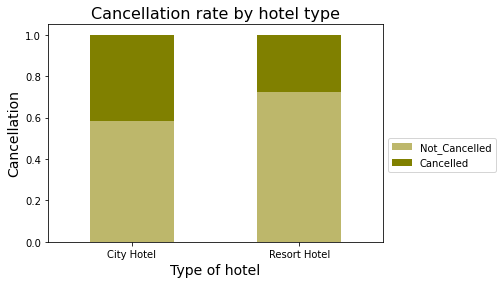

In [327]:
#visualizing cancellation rate by hotel type
figure = plt.figure(figsize=[8,5])
pd.crosstab(hotel_data['hotel'], hotel_data['is_canceled'], normalize='index').plot.bar(stacked=True, color=['darkkhaki', 'olive'])
plt.title('Cancellation rate by hotel type', fontsize=16)
plt.xlabel('Type of hotel', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

<AxesSubplot:>

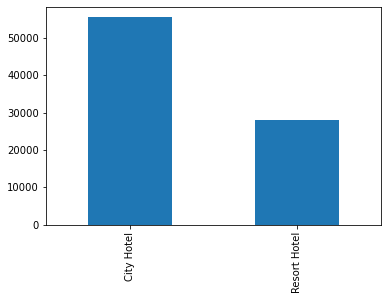

In [330]:
# visualizing total bookings by each type of hotel
hotel_data.hotel.value_counts().plot.bar()

**Interpretation:**
- The proportion of cancelled bookings is greater in city hotels compared to resort hotels.
- Additionally, it can be observed that City hotels receive a larger number of bookings, which could be a contributing factor to the higher cancellation rate

### Lead_time and Cancellation

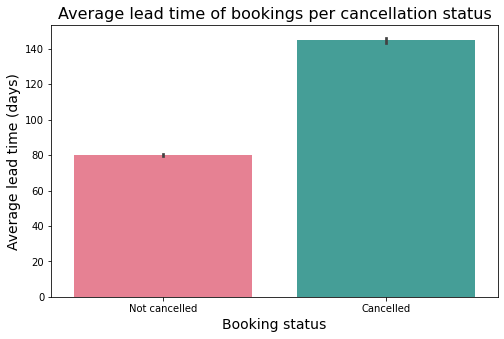

In [261]:
#Visualizing Average lead time for cancelled and not cancelled bookings
figure = plt.figure(figsize=[8,5])
sns.barplot(data=hotel_data, x='is_canceled', y='lead_time',palette='husl')
plt.title('Average lead time of bookings per cancellation status', fontsize=16)
plt.xlabel('Booking status', fontsize=14)
plt.ylabel('Average lead time (days)', fontsize=14)
plt.xticks(ticks=[0,1], labels=['Not cancelled', 'Cancelled'], fontsize=10)
plt.show()

**Interpretation:**
- The longer the lead time, the greater the possibility that the customer will cancel the hotel booking
- This could be because a longer lead time provides customers with more time to change their plans or encounter unexpected circumstances, which could lead to a higher likelihood of cancellation.

### Guest location and Cancellation

In [332]:
pd.crosstab(hotel_data['guest_location'], hotel_data['is_canceled'], normalize='index')

is_canceled,0,1
guest_location,,
International,0.764036,0.235964
Local,0.434649,0.565351


<Figure size 576x360 with 0 Axes>

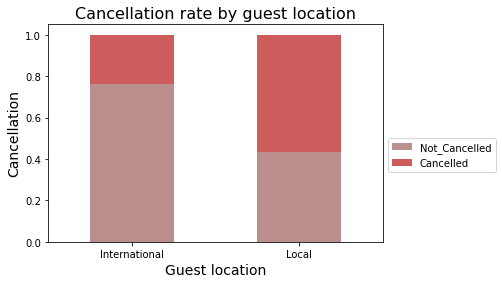

In [334]:
#visualizing cancellation rate by guest location
figure = plt.figure(figsize=[8,5])
pd.crosstab(hotel_data['guest_location'], hotel_data['is_canceled'], normalize='index').plot.bar(stacked=True, color=['rosybrown', 'indianred'])
plt.title('Cancellation rate by guest location', fontsize=16)
plt.xlabel('Guest location', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

In [348]:
pd.crosstab(hotel_data['guest_location'], hotel_data['previous_cancellations'], normalize='index')

previous_cancellations,cancelled before,never cancelled
guest_location,,
International,0.004546,0.995454
Local,0.126753,0.873247


<Figure size 576x360 with 0 Axes>

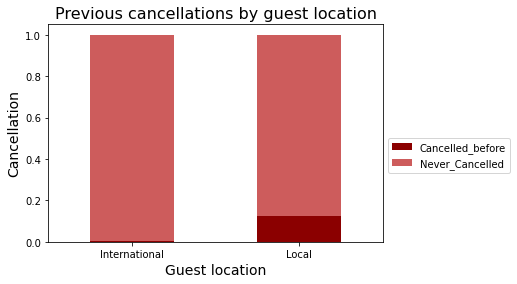

In [351]:
#visualizing Previous cancellations by guest location
figure = plt.figure(figsize=[8,5])
pd.crosstab(hotel_data['guest_location'], hotel_data['previous_cancellations'], normalize='index').plot.bar(stacked=True, color=['darkred','indianred'])
plt.title('Previous cancellations by guest location', fontsize=16)
plt.xlabel('Guest location', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Cancelled_before', 'Never_Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

**Interpretation:**
- It can be observed that local customers have high cancellation rate than international customers.
- Along with that it can be observed that local customers have a higher rate of previously cancelled hotel bookings compared to international customers.

### Previous_cancellations and Cancellation

In [318]:
pd.crosstab(hotel_data['previous_cancellations'], hotel_data['is_canceled'], normalize='index')

is_canceled,0,1
previous_cancellations,,
cancelled before,0.082174,0.917826
never cancelled,0.661484,0.338516


<Figure size 576x360 with 0 Axes>

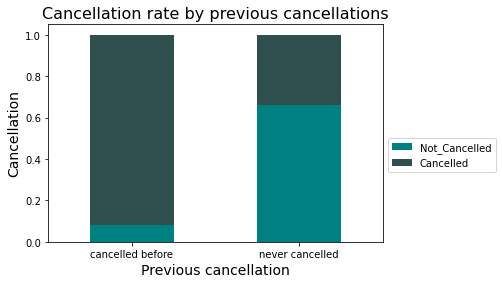

In [323]:
figure = plt.figure(figsize=[8,5])
pd.crosstab(hotel_data['previous_cancellations'], hotel_data['is_canceled'], normalize='index').plot.bar(stacked=True, color=['teal', 'darkslategray'])
plt.title('Cancellation rate by previous cancellations', fontsize=16)
plt.xlabel('Previous cancellation', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

**Interpretation:**
- It can be observed that customers who have previously canceled their hotel bookings are highly likely, at a probability of 92%, to cancel their future bookings as well.

### Repeated guest and cancellation

In [354]:
pd.crosstab(hotel_data['is_repeated_guest'], hotel_data['is_canceled'], normalize='index')

is_canceled,0,1
is_repeated_guest,,
0,0.622712,0.377288
1,0.855784,0.144216


<Figure size 576x360 with 0 Axes>

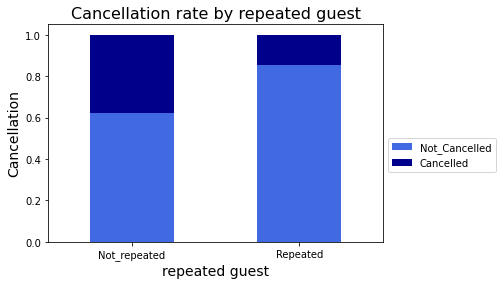

In [361]:
figure = plt.figure(figsize=[8,5])
pd.crosstab(hotel_data['is_repeated_guest'], hotel_data['is_canceled'], normalize='index').plot.bar(stacked=True, color=['royalblue', 'darkblue'])
plt.title('Cancellation rate by repeated guest', fontsize=16)
plt.xlabel('repeated guest', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(ticks=[0,1],labels=['Not_repeated', 'Repeated'], rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

**Interpretation:**
- The cancellation rate among non-repeated guests is higher than that of repeated guests.

### Customer type and cancellation

In [368]:
pd.crosstab(hotel_data['customer_type'], hotel_data['is_canceled'], normalize='index').sort_values(1, ascending = False)

is_canceled,0,1
customer_type,,
Transient,0.593499,0.406501
Contract,0.692710,0.307290
Transient-Party,0.743904,0.256096
Group,0.900000,0.100000


<Figure size 864x360 with 0 Axes>

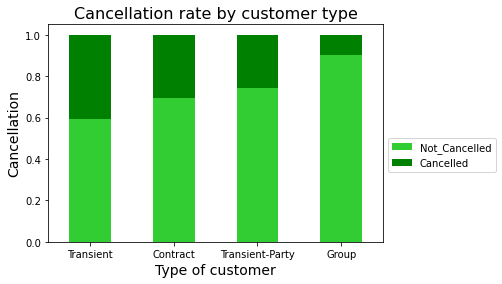

In [390]:
figure = plt.figure(figsize=[12,5])
pd.crosstab(hotel_data['customer_type'], hotel_data['is_canceled'], normalize='index').sort_values(1, ascending = False).plot.bar(stacked=True, color=['limegreen', 'green'])
plt.title('Cancellation rate by customer type', fontsize=16)
plt.xlabel('Type of customer', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

**Interpretation:**
- "Transient" customer type has the highest cancellation rate of more than 40%.
- And "Group" customer type has least cancellation rate.

### Market segment and cancellation

In [373]:
pd.crosstab(hotel_data['market_segment'], hotel_data['is_canceled'], normalize='index').sort_values(1, ascending=False)

is_canceled,0,1
market_segment,,
Groups,0.389006,0.610994
Online TA,0.634529,0.365471
Offline TA/TO,0.656125,0.343875
Aviation,0.780488,0.219512
Corporate,0.816526,0.183474
Direct,0.842965,0.157035
Complementary,0.871154,0.128846


<Figure size 1080x576 with 0 Axes>

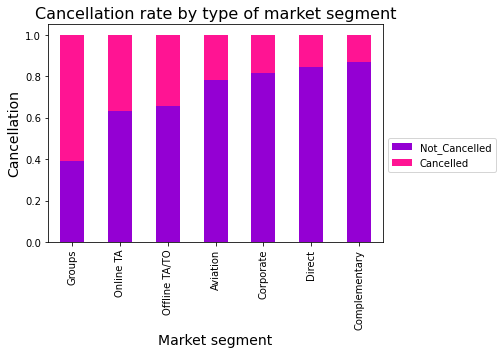

In [417]:
figure = plt.figure(figsize=[15,8])
pd.crosstab(hotel_data['market_segment'], hotel_data['is_canceled'], normalize='index').sort_values(1, ascending=False).plot.bar(stacked=True, color=['darkviolet', 'deeppink'])
plt.title('Cancellation rate by type of market segment', fontsize=16)
plt.xlabel('Market segment', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=90)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

**Interpretation:**
- The market segment "Groups" has the highest cancellation rate of 61%.
- And "Direct" has least cancellations after "Complimentary".

### Deposite_type and cancellation

<Figure size 576x576 with 0 Axes>

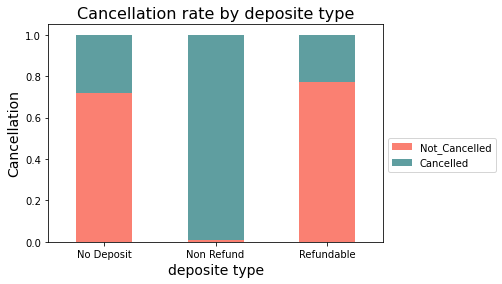

In [301]:
figure = plt.figure(figsize=[8,8])
pd.crosstab(hotel_data['deposit_type'], hotel_data['is_canceled'], normalize='index').plot.bar(stacked=True, color=['salmon', 'cadetblue'])
plt.title('Cancellation rate by deposite type', fontsize=16)
plt.xlabel('deposite type', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

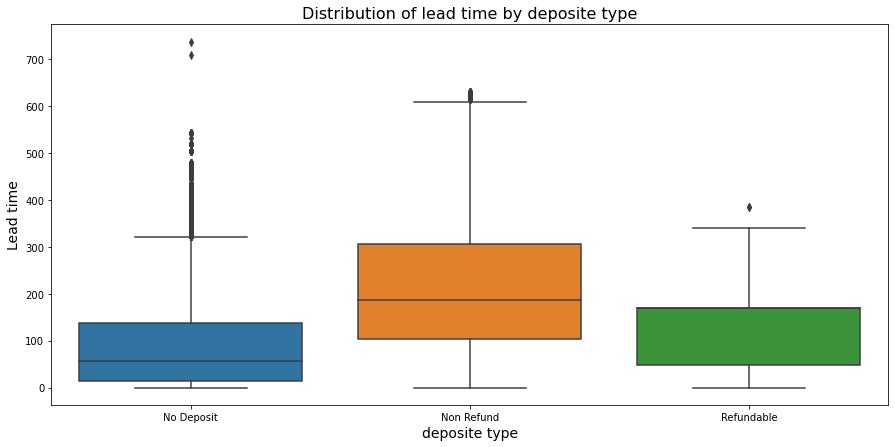

In [300]:
# Visualizing lead_time and cancellation

figure = plt.figure(figsize=[15,7])
sns.boxplot(data=hotel_data, y='lead_time', x='deposit_type')
plt.title('Distribution of lead time by deposite type', fontsize=16)
plt.xlabel('deposite type', fontsize=14)
plt.ylabel('Lead time', fontsize=14)
plt.show()

**Interpretation:**
- Surprisingly, customers with non-refundable deposit type have a much higher percentage of canceled reservations.
- One of the reasons is because hotel bookings with non-refundable deposit types have the highest median lead time

### Booking changes and cancellation

In [394]:
hotel_data.booking_changes.value_counts()

no     70894
yes    12545
Name: booking_changes, dtype: int64

In [396]:
pd.crosstab(hotel_data['booking_changes'], hotel_data['is_canceled'], normalize='index')

is_canceled,0,1
booking_changes,,
no,0.592744,0.407256
yes,0.840893,0.159107


<Figure size 576x360 with 0 Axes>

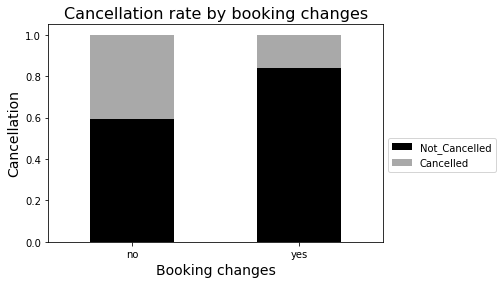

In [398]:
figure = plt.figure(figsize=[8,5])
pd.crosstab(hotel_data['booking_changes'], hotel_data['is_canceled'], normalize='index').plot.bar(stacked=True, color=['black', 'darkgrey'])
plt.title('Cancellation rate by booking changes', fontsize=16)
plt.xlabel('Booking changes', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

**Interpretation:**
- Customers who modify their booking details are less likely to cancel compared to those who do not make any changes to their booking details.

### special_requests and Cancellation

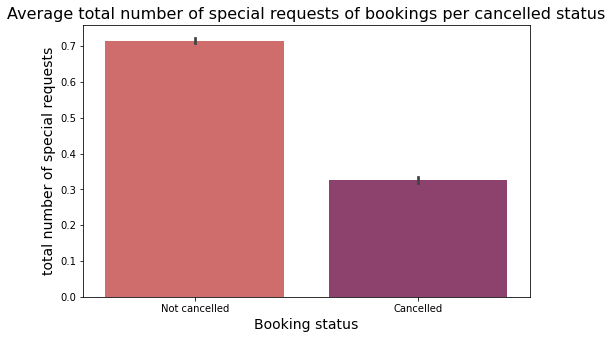

In [209]:
# Visualizing the average total number of special requests for cancelled and not cancelled bookings
plt.figure(figsize=[8,5])
sns.barplot(x=hotel_data['is_canceled'], y=hotel_data['total_of_special_requests'], palette='flare')
plt.title('Average total number of special requests of bookings per cancelled status', fontsize=16)
plt.xlabel('Booking status', fontsize=14)
plt.ylabel('total number of special requests', fontsize=14)
plt.xticks(ticks=[0,1], labels=['Not cancelled', 'Cancelled'])
plt.show()

**Interpretation:**
- we can see that the higher the number of the total special request the lower the cancellation rate.
- Means that the customer who booked and made extra requests are more likely not to cancel compared to the customers who did not make any special request.

### Required_car_parking_spaces and Cancellation

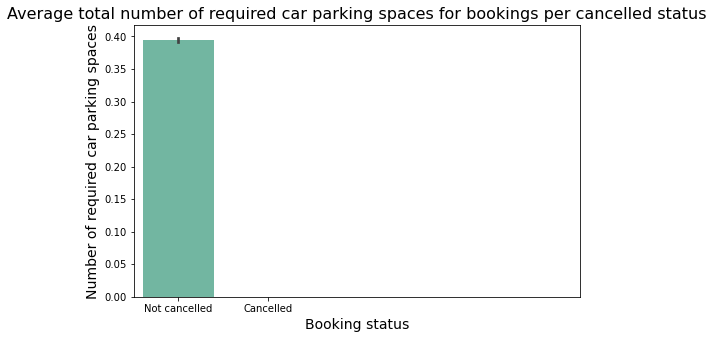

In [210]:
# Visualizing Average total number of required car parking spaces bookings per cancelled status
plt.figure(figsize=[8,5])
sns.barplot(x=hotel_data['required_car_parking_spaces'], y=hotel_data['is_canceled'], palette='Set2')
plt.title('Average total number of required car parking spaces for bookings per cancelled status', fontsize=16)
plt.xlabel('Booking status', fontsize=14)
plt.ylabel('Number of required car parking spaces', fontsize=14)
plt.xticks(ticks=[0,1], labels=['Not cancelled', 'Cancelled'])
plt.show()

**Interpretation:**
- It shows that customer who need a parking spot for their vehicle actually never cancelled their hotel booking.
- It is also fair to think that by the time a guest is thinking about where they will park their car, they are most likely pretty commited to their destination.

### Arrival_month and Cancellation

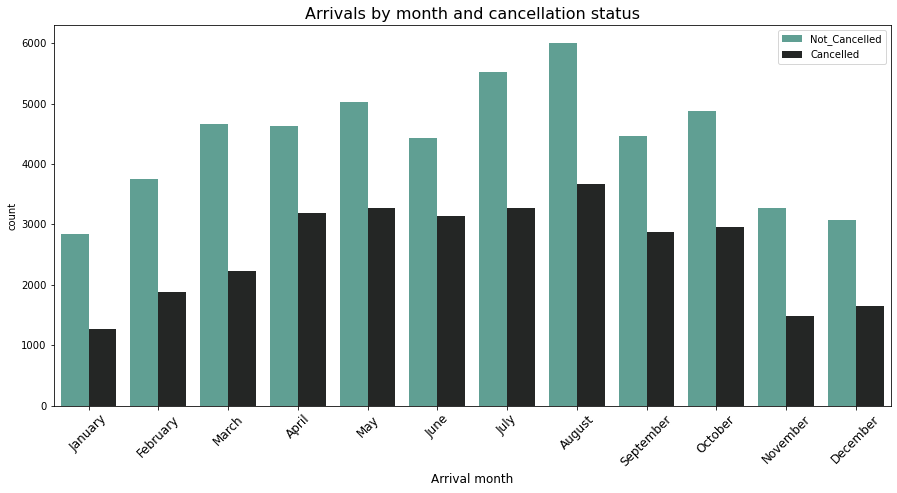

In [404]:
# Visualizing the number of cancelled and not cancelled bookings by arrival date

hotel_data['arrival_month'] = pd.Categorical(hotel_data['arrival_date'].dt.month_name(),
                                categories = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                                ordered = True)
plt.figure(figsize=[15,7])
sns.countplot(data=hotel_data, x='arrival_month', hue='is_canceled', palette='dark:#5A9_r')
plt.title('Arrivals by month and cancellation status', fontsize=16)
plt.xlabel('Arrival month', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.legend(['Not_Cancelled','Cancelled'])
plt.show()


In [271]:
pd.crosstab(hotel_data['arrival_month'], hotel_data['is_canceled'], normalize='index').sort_values(1, ascending= False)

is_canceled,0,1
arrival_month,,
June,0.584764,0.415236
April,0.591618,0.408382
May,0.606002,0.393998
September,0.608411,0.391589
August,0.620950,0.379050
October,0.622579,0.377421
July,0.628409,0.371591
December,0.651242,0.348758
February,0.667081,0.332919


**Interpretation**
- The same pattern can be seen in 'cancelled' and 'no cancelled' bookings.
- where highest cancellation months are:
    - june(41.5%)
    - april(40.8%)
    - may(39.3%)
    - and these are summer months.

### Reserved_room_type and Cancellation

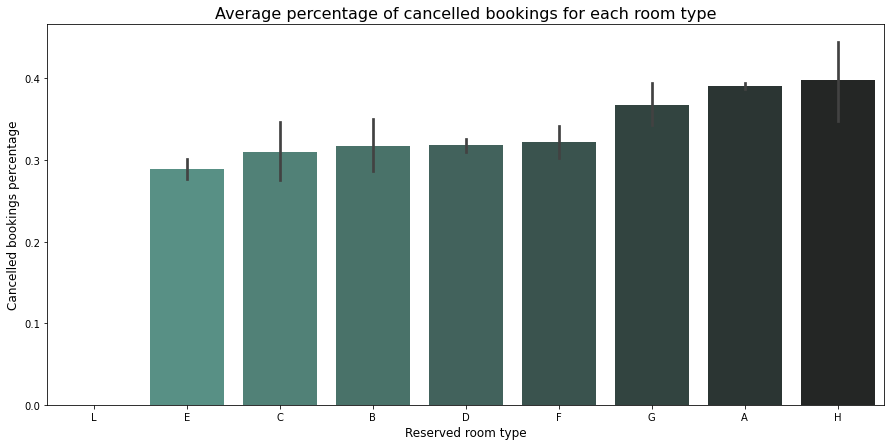

In [252]:
# visualizing percentage of cancelled bookings for each room type

plt.figure(figsize=[15,7])
sns.barplot(data=hotel_data, x='reserved_room_type', y='is_canceled', palette='dark:#5A9_r', order=hotel_data.groupby('reserved_room_type')['is_canceled'].mean().sort_values().index)
plt.title('Average percentage of cancelled bookings for each room type', fontsize=16)
plt.xlabel('Reserved room type', fontsize=12)
plt.ylabel('Cancelled bookings percentage', fontsize=12)
plt.show()

In [256]:
reserved = hotel_data.groupby('reserved_room_type')['is_canceled'].mean().sort_values().reset_index
reserved

<bound method Series.reset_index of reserved_room_type
L    0.000000
E    0.289548
C    0.309677
B    0.316794
D    0.317935
F    0.322581
G    0.367123
A    0.390573
H    0.398477
Name: is_canceled, dtype: float64>

**Interpretation:**
- Customers who reserved room type H have the highest percentage booking cancellation with 39.8% of bookings canceled.

### Distribution_channel and Cancellation

In [ ]:
pd.crosstab(hotel_data['distribution_channel'], hotel_data['is_canceled'], normalize='index').sort_values(1,ascending=False)

<Figure size 576x360 with 0 Axes>

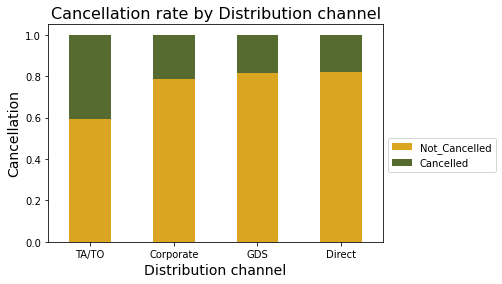

In [413]:
figure = plt.figure(figsize=[8,5])
pd.crosstab(hotel_data['distribution_channel'], hotel_data['is_canceled'], normalize='index').sort_values(1,ascending=False).plot.bar(stacked=True, color=['goldenrod', 'darkolivegreen'])
plt.title('Cancellation rate by Distribution channel', fontsize=16)
plt.xlabel('Distribution channel', fontsize=14)
plt.ylabel('Cancellation', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Not_Cancelled','Cancelled'], loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

**Interpretation:**
- The Travel Agent/Tour Operator distribution channel has the highest cancellation rate,
- while the Direct distribution channel has the lowest cancellation rate.
- Bookings through the undefined distribution channel are not included in the analysis.

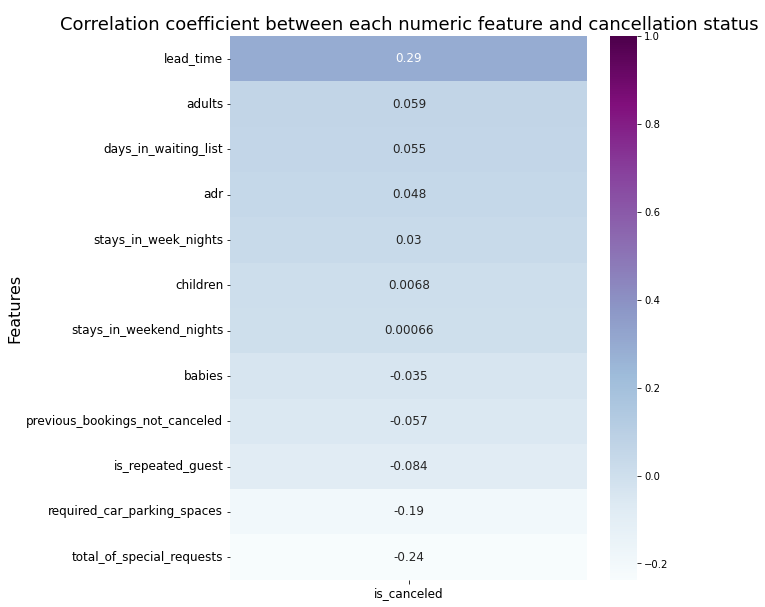

In [190]:
# Visualizing correlation between features and cancellation status
fig = plt.figure(figsize = (8,10))
ax = sns.heatmap(hotel_data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot=True, annot_kws={'size':12}, cmap='BuPu')
ax.set_title('Correlation coefficient between each numeric feature and cancellation status', fontsize=18)
ax.set_ylabel('Features', fontsize=16)
ax.tick_params(axis='both', labelsize=12)
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1)
plt.show()